## Clustering
I start copying the PCA results from the PCA file and start working on them


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib widget   
from sklearn.decomposition import PCA           #PCA Library
from sklearn.metrics import silhouette_score    #Evaluation of Clustering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

filepath_HCC_Fil = "raw_data/HCC1806_SmartS_Filtered_Data.txt"
df_HCC_Fil = pd.read_csv(filepath_HCC_Fil,delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df_HCC_Fil.T))

Dataframe dimensions: (227, 19503)


In [91]:
steps = [('scaler', StandardScaler()), ('normalizer', MinMaxScaler())]
pipeline = Pipeline(steps)

In [92]:
X_Scaled = pd.DataFrame(pipeline.fit_transform(df_HCC_Fil.T), columns=df_HCC_Fil.T.columns)
X_Scaled.index = df_HCC_Fil.T.index
X_Scaled.head()

,"""CICP27""","""DDX11L17""","""WASH9P""","""OR4F29""","""MTND1P23""","""MTND2P28""","""MTCO1P12""","""MTCO2P12""","""MTATP8P1""","""MTATP6P1""",...,"""MT-TH""","""MT-TS2""","""MT-TL2""","""MT-ND5""","""MT-ND6""","""MT-TE""","""MT-CYB""","""MT-TT""","""MT-TP""","""MAFIP"""
"""output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam""",0.0,0.000000,0.0,0.5,0.359307,0.450000,0.486813,0.500000,0.25,0.412065,...,0.326923,0.116279,0.263158,0.428189,0.624128,0.103774,0.365044,0.168831,0.228374,0.000000
"""output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam""",0.0,0.000000,0.0,0.0,0.610390,0.833333,0.655163,0.416667,0.25,0.695837,...,0.942308,0.674419,0.631579,0.830802,1.000000,0.202830,0.567080,0.402597,0.245675,0.166667
"""output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam""",0.0,0.000000,0.0,0.0,0.089466,0.133333,0.284792,0.250000,0.00,0.275701,...,0.826923,0.395349,0.140351,0.163167,0.159693,0.000000,0.419115,0.071429,0.010381,0.291667
"""output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam""",0.0,0.000000,0.0,0.0,0.037518,0.025000,0.083614,0.000000,0.00,0.036958,...,0.000000,0.000000,0.052632,0.031829,0.019526,0.000000,0.020088,0.025974,0.031142,0.000000
"""output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam""",0.0,0.083333,0.0,0.0,0.115440,0.008333,0.163300,0.000000,0.00,0.066695,...,0.019231,0.000000,0.000000,0.070583,0.051604,0.014151,0.054159,0.000000,0.048443,0.375000


## Pseudo Cross-Validation for fixing Number of Clusters

In [93]:
def OptimalN(X):
    df = pd.DataFrame(columns=['Clusters', 'Silhouette_Score'])
    
    for n in range(2,11):
        kmeans = KMeans(n_clusters=n, n_init="auto")
        kmeans.fit(X)
        labels = kmeans.fit_predict(X)
        ss = silhouette_score(X, labels, metric='euclidean')
        row = pd.DataFrame({'Clusters':[n], 'Silhouette_Score':[ss]})
        df = pd.concat([df,row],axis=0,ignore_index=True)
    print(df.head())
    max_row = df.loc[df['Silhouette_Score'].idxmax()]
    return max_row

## Clustering on 2-Dimensional PCA
I've applied a k-means clustering algorithm on the result of a 2-dim PCA to visualize the clusters.

In [94]:
pca_HCC_2 = PCA(n_components=2)
pca_HCC_2.fit(X_Scaled)

pca_transf_2 = pca_HCC_2.transform(X_Scaled)
pca_df_visual = pd.DataFrame(pca_transf_2, columns=["PC1","PC2"])
pca_df_visual.head()

,PC1,PC2
0,3.390822,-7.957267
1,24.442489,-7.131607
2,9.000931,7.729627
3,-10.292062,0.775303
4,-10.078631,2.489128


In [95]:
X=pca_df_visual

# apply function to find optimal n
Cross_Val = OptimalN(X)
n = int(Cross_Val[0])
print(f"The optimal number of clusters is {n} with a Silhouette Score of {Cross_Val[1]}")
kmeans = KMeans(n_clusters=n, n_init="auto")
kmeans.fit(X)

  Clusters  Silhouette_Score
0        2          0.551908
1        3          0.479849
2        4          0.475347
3        5          0.467217
4        6          0.489637
The optimal number of clusters is 2 with a Silhouette Score of 0.551908352377342


KMeans(n_clusters=2, n_init='auto')

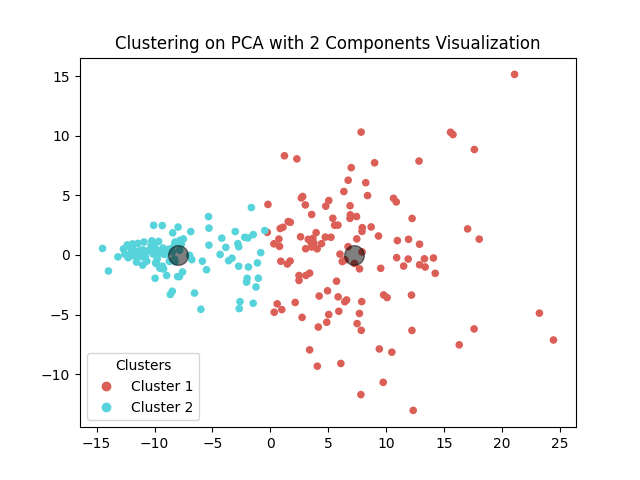

In [96]:
# visualize clustering
fig = plt.figure()
colors = sns.color_palette("hls", n)
cols = [colors[i] for i in kmeans.labels_]
plt.scatter(X["PC1"], X["PC2"], c=cols, s=20)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label='Cluster %d' % (i+1)) for i, color in enumerate(colors)]
legend = plt.legend(handles=handles, loc="lower left", title="Clusters")
plt.title("Clustering on PCA with 2 Components Visualization")
fig.canvas.header_visible = False
plt.show()


## Clustering on 3-Dimensional PCA
I've applied a k-means clustering algorithm on the result of a 3-dim PCA to visualize the clusters.

In [97]:
pca_HCC_3 = PCA(n_components=3)
pca_HCC_3.fit(X_Scaled)

pca_transf_3 = pca_HCC_3.transform(X_Scaled)
X_df2 = pd.DataFrame(pca_transf_3, columns=["PC1","PC2","PC3"])
X_df2.head()

,PC1,PC2,PC3
0,3.390822,-7.957376,1.539830
1,24.442489,-7.128509,0.363742
2,9.000931,7.728898,1.831613
3,-10.292062,0.774896,-0.723701
4,-10.078631,2.490531,3.382278


In [98]:
# apply function to find optimal n
Cross_Val = OptimalN(X_df2)
n = int(Cross_Val[0])
print(f"The optimal number of clusters is {n} with a Silhouette Score of {Cross_Val[1]}")
kmeans = KMeans(n_clusters=n, n_init="auto")
kmeans.fit(X_df2)

  Clusters  Silhouette_Score
0        2          0.504242
1        3          0.420392
2        4          0.374791
3        5          0.429727
4        6          0.419749
The optimal number of clusters is 2 with a Silhouette Score of 0.5042423311611649


KMeans(n_clusters=2, n_init='auto')

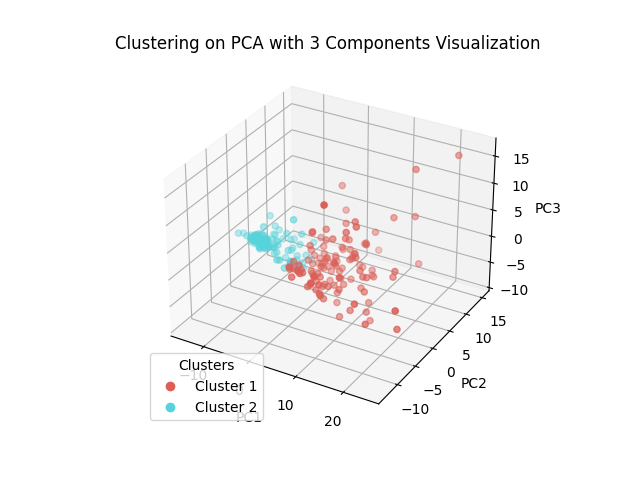

In [99]:
# Visualize the results
colors = sns.color_palette("hls", n)
cols = [colors[i] for i in kmeans.labels_]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(X_df2["PC1"], X_df2["PC2"], X_df2["PC3"], c=cols)
handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label='Cluster %d' % (i+1)) for i, color in enumerate(colors)]
legend = plt.legend(handles=handles, loc="lower left", title="Clusters")
plt.title("Clustering on PCA with 3 Components Visualization")
fig.canvas.header_visible = False
plt.show()

## Clustering Before PCA

In [100]:
# apply function to find optimal n
Cross_Val = OptimalN(X_Scaled)
n = int(Cross_Val[0])
print(f"The optimal number of clusters is {n} with a Silhouette Score of {Cross_Val[1]}")
kmeans = KMeans(n_clusters=n, n_init="auto")
kmeans.fit(X_Scaled)

# Reduce the data to 2 dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_Scaled)

  Clusters  Silhouette_Score
0        2          0.170084
1        3          0.165431
2        4          0.113510
3        5          0.083726
4        6         -0.071326
The optimal number of clusters is 2 with a Silhouette Score of 0.1700839152216188


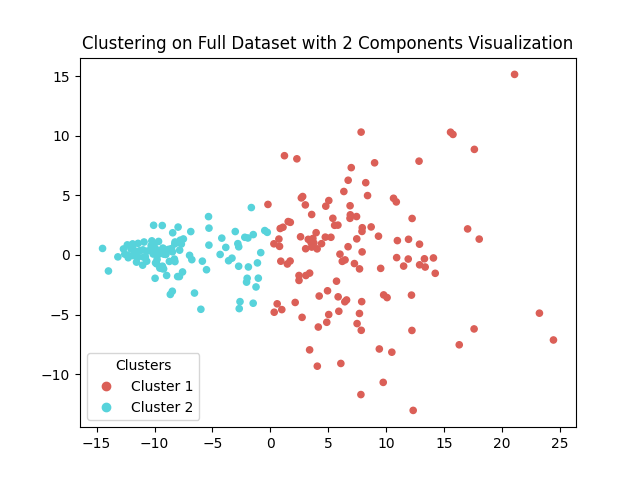

In [101]:
# visualize clustering
colors = sns.color_palette("hls", n)
cols = [colors[i] for i in kmeans.labels_]
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=cols, s=20)
handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label='Cluster %d' % (i+1)) for i, color in enumerate(colors)]
legend = plt.legend(handles=handles, loc="lower left", title="Clusters")
plt.title("Clustering on Full Dataset with 2 Components Visualization")
fig.canvas.header_visible = False
plt.show()


The result from clustering Before/After PCA may give different results (It is strongly dependent on initial cluster points)!!! 

However, due to the function performing clustering 10 times, applying it to the high-dimensional data takes ages (1min 37s vs 1.6s)

## Confrontation with Theoretical Differentiation

In [102]:
filepath_HCC = "raw_data/HCC1806_SmartS_MetaData.tsv"
df_meta_HCC = pd.read_csv(filepath_HCC,delimiter="\t",engine='python',index_col=0)

In [103]:
names = [cell[1:-1] for cell in df_HCC_Fil.T.index]
hypo = [df_meta_HCC.loc[i,"Condition"] for i in names]
One_Hot_Hypo = [1 if x=="Normo" else 0 for x in hypo]
empirical = kmeans.labels_

In [104]:
X_df = pd.DataFrame(X_pca, columns=["PC1","PC2"])
X_df.head()

,PC1,PC2
0,3.390822,-7.957219
1,24.442489,-7.128896
2,9.000931,7.727126
3,-10.292062,0.775075
4,-10.078631,2.490695


In [105]:
X_df["Clusters"]=empirical
X_df["Condition"]=One_Hot_Hypo
X_df.head()

,PC1,PC2,Clusters,Condition
0,3.390822,-7.957219,0,1
1,24.442489,-7.128896,0,1
2,9.000931,7.727126,0,0
3,-10.292062,0.775075,1,0
4,-10.078631,2.490695,1,0


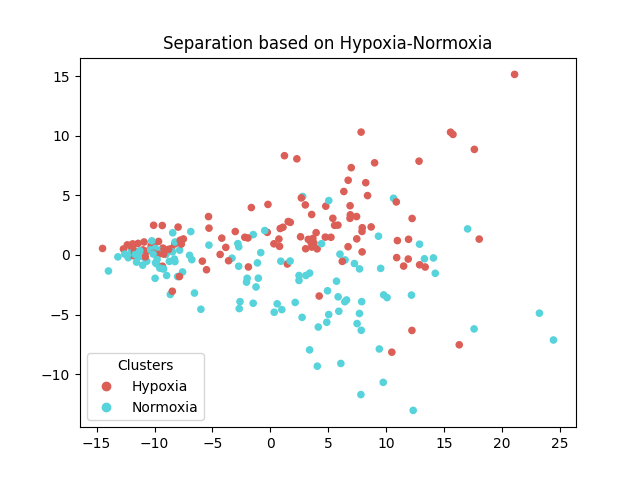

In [106]:
fig = plt.figure()
ax = fig.add_subplot()
colors = sns.color_palette("hls", 2)
cols = [colors[i] for i in X_df["Condition"]]
ax.scatter(x=X_df["PC1"], y=X_df["PC2"], c=cols, s=20)
labels = ["Hypoxia", "Normoxia"]
handles = [plt.Line2D([], [], marker='o',linestyle="", color=color, label=labels[i]) for i, color in enumerate(colors)]
legend = plt.legend(handles=handles, loc="lower left", title="Clusters")
plt.title("Separation based on Hypoxia-Normoxia")
fig.canvas.header_visible = False
plt.show()